In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
import os
os.chdir('/home/tapas/data/')
os.listdir(".")

['fill.csv']

# Loading of data

In [3]:
df = pd.read_csv('fill.csv')

In [4]:
df.head(5)

,PROMSHR,PROMPLEDG,FORPROM,Market.Capitalisation,EPS,P.E,P.B,BVS,Beta,TA,...,CR,DE,CASHCL,CASHCOS,TURNOVER,NAT,PVT,FORGN,OTHERS,Target
0,56.90,54.14,52.55,17369.43,20.21,16.88,3.39,100.58,1.32,10270.0,...,0.80,0.76,0.16,99.50,7043.6,9,0,0,0,1
1,56.90,0.00,52.02,36643.33,29.88,24.08,5.35,134.52,1.03,21981.0,...,0.43,0.73,0.07,46.50,9668.4,7,2,0,0,1
2,57.14,71.43,22.17,4216.33,32.92,2.52,0.50,164.71,1.17,42052.5,...,0.48,2.03,0.02,17.35,14122.2,8,2,0,0,1
3,57.14,60.03,48.83,12730.45,43.23,5.78,1.18,211.24,1.38,53942.3,...,0.40,2.69,0.07,7.59,18076.7,9,2,0,0,1
4,60.72,67.95,52.48,18431.15,36.68,9.87,1.49,243.66,1.38,76049.5,...,0.88,1.93,0.13,149.58,20770.9,9,2,0,0,1


In [5]:
df.shape

(410, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 39 columns):
PROMSHR                  410 non-null float64
PROMPLEDG                410 non-null float64
FORPROM                  410 non-null float64
Market.Capitalisation    410 non-null float64
EPS                      410 non-null float64
P.E                      410 non-null float64
P.B                      410 non-null float64
BVS                      410 non-null float64
Beta                     410 non-null float64
TA                       410 non-null float64
Alpha                    410 non-null float64
PBDITAINC                410 non-null float64
PBTINC                   410 non-null float64
PATINC                   410 non-null float64
CASHPRFINC               410 non-null float64
PBDITAMARG               410 non-null float64
OPMARG                   410 non-null float64
OPRFINCOS                410 non-null float64
PBPTEQ                   410 non-null float64
ROE                  

# Outlier Detection

In [8]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [9]:
df.columns

Index(['PROMSHR', 'PROMPLEDG', 'FORPROM', 'Market.Capitalisation', 'EPS',
       'P.E', 'P.B', 'BVS', 'Beta', 'TA', 'Alpha', 'PBDITAINC', 'PBTINC',
       'PATINC', 'CASHPRFINC', 'PBDITAMARG', 'OPMARG', 'OPRFINCOS', 'PBPTEQ',
       'ROE', 'RONW', 'CASHROE', 'PBPTCE', 'ROCE', 'PATCE', 'PBPTTA', 'ROTA',
       'PATTA', 'QR', 'CR', 'DE', 'CASHCL', 'CASHCOS', 'TURNOVER', 'NAT',
       'PVT', 'FORGN', 'OTHERS', 'Target'],
      dtype='object')

In [10]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,['PROMSHR', 'PROMPLEDG', 'FORPROM', 'Market.Capitalisation', 'EPS',
       'P.E', 'P.B', 'BVS', 'Beta', 'TA', 'Alpha', 'PBDITAINC', 'PBTINC',
       'PATINC', 'CASHPRFINC', 'PBDITAMARG', 'OPMARG', 'OPRFINCOS', 'PBPTEQ',
       'ROE', 'RONW', 'CASHROE', 'PBPTCE', 'ROCE', 'PATCE', 'PBPTTA', 'ROTA',
       'PATTA', 'QR', 'CR', 'DE', 'CASHCL', 'CASHCOS', 'TURNOVER'])

In [13]:
df.loc[Outliers_to_drop] # Show the outliers rows

,PROMSHR,PROMPLEDG,FORPROM,Market.Capitalisation,EPS,P.E,P.B,BVS,Beta,TA,...,CR,DE,CASHCL,CASHCOS,TURNOVER,NAT,PVT,FORGN,OTHERS,Target
7,67.92,91.38,54.21,13030.89,-15.66,28.83,0.98,260.96,1.31,124561.6,...,1.06,4.05,0.02,99.44,16188.1,19,2,0,3,1
8,58.67,95.35,0.05,12208.12,-161.10,21.38,2.41,94.14,0.67,123546.0,...,1.08,14.42,0.01,37.64,3901.2,19,2,0,3,1
9,33.26,99.33,0.00,2593.48,-505.02,23.61,50.71,-590.88,0.69,111067.5,...,0.74,0.20,0.01,49.17,343.1,19,2,2,3,1
29,37.02,94.17,0.00,6225.48,-31.02,12.03,0.10,46.83,2.01,367956.0,...,1.06,3.26,0.01,4.20,119522.0,3,0,0,0,1
34,32.58,91.38,0.00,32650.80,9.18,16.44,0.80,188.71,0.91,69872.7,...,4.53,0.77,1.64,205.25,19131.8,3,0,0,0,1
120,20.25,98.75,0.00,5895.84,33.00,9.60,2.13,148.77,0.88,4023.4,...,3.12,0.00,2.50,2118.66,112887.0,5,0,0,0,1
121,24.23,99.46,52.02,13721.20,54.63,10.87,2.94,201.79,1.05,23438.5,...,26.87,0.43,26.87,10917.91,3901.2,8,0,0,0,1
122,58.17,95.99,15.21,10026.97,12.48,5.60,1.14,61.23,0.85,33292.3,...,12.56,2.66,12.56,10917.91,32478.4,10,0,0,0,1
124,58.92,76.46,22.17,34292.69,13.61,13.85,1.97,95.57,0.94,57629.2,...,0.14,1.99,0.09,1347.17,81.9,8,0,0,0,1
125,59.99,79.07,26.00,25055.85,9.84,14.01,1.36,101.64,0.94,57629.2,...,0.22,3.21,0.07,211.64,671.4,10,0,0,0,1


In [14]:
df.loc[Outliers_to_drop].shape

(154, 39)

In [16]:
# Drop outliers
#df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Modelling

In [18]:
train = df

In [19]:
X_train = train.drop(labels = ["Target"],axis = 1)
Y_train = train["Target"]

In [22]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

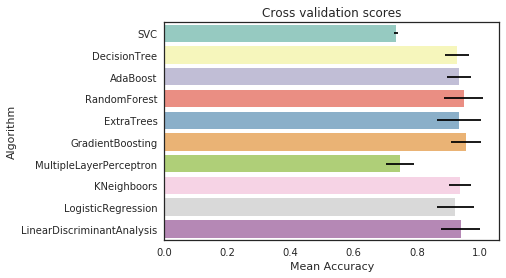

In [23]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [24]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 368 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    7.2s finished


In [25]:
gsadaDTC.best_score_

0.94146341463414629

In [26]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


0.96585365853658534

In [27]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.7min finished


0.97317073170731705

In [28]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   44.9s finished


0.96585365853658534

In [29]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   17.4s finished


0.73414634146341462

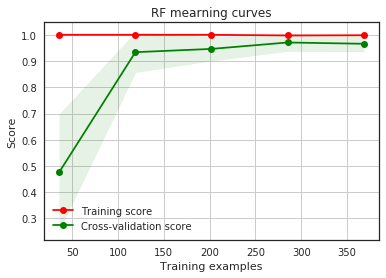

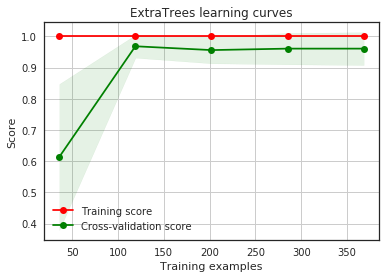

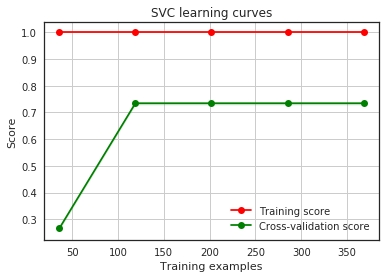

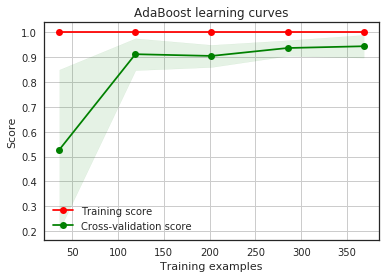

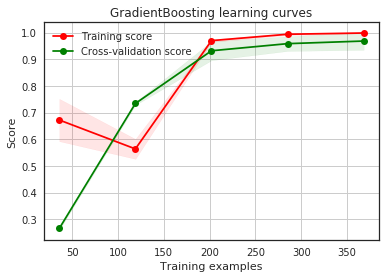

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

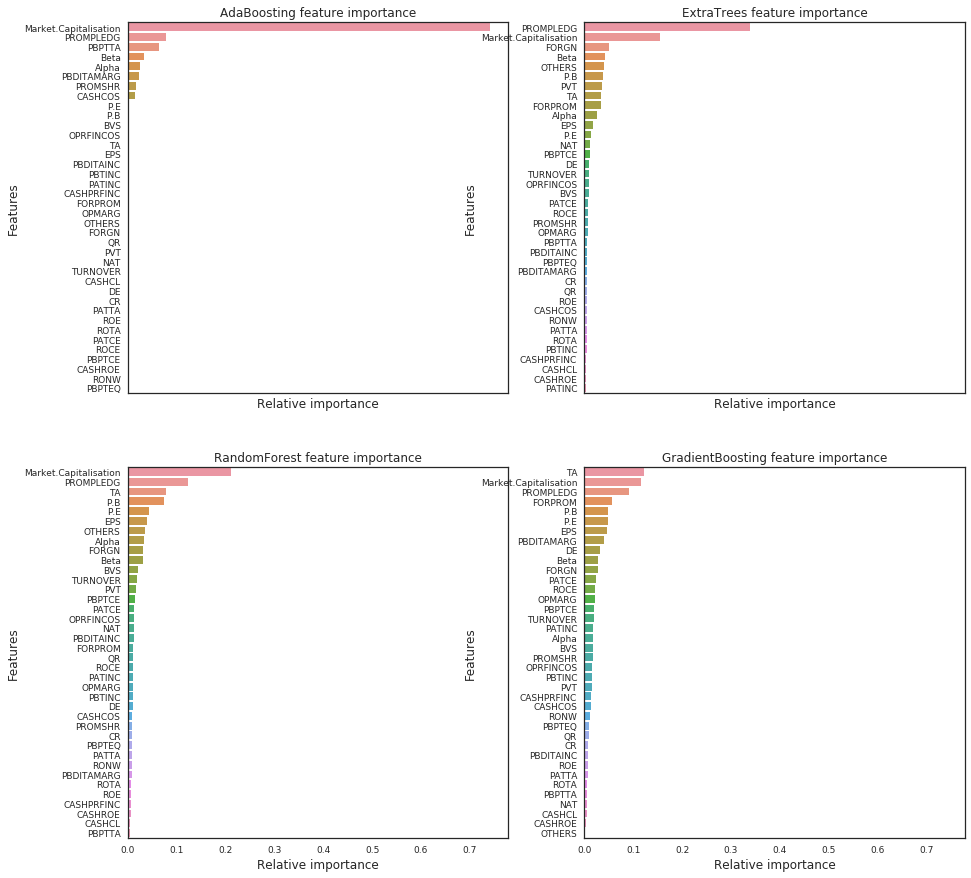

In [31]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [32]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

NameError: name 'test' is not defined

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [ ]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)